<a href="https://colab.research.google.com/github/choyoujung/data-analysis/blob/main/%ED%95%84%EB%9D%BC%ED%85%8C%EC%8A%A4_%EC%9C%84%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [72]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'NanumGothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정

In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install selenium
!pip install chromedriver-autoinstaller

In [2]:
import pandas as pd
import requests
import chromedriver_autoinstaller
from bs4 import BeautifulSoup
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# # chrome driver를 자동으로 설치함
# chromedriver_autoinstaller.install()

# options = webdriver.ChromeOptions() # Browser 세팅하기
# options.add_argument('lang=ko_KR') # 사용언어 한국어
# options.add_argument('disable-gpu') # 하드웨어 가속 안함
# options.add_argument('headless') # 창 숨기기

# # 브라우저 세팅
# driver = webdriver.Chrome(options=options)

url = 'https://m.search.naver.com/search.naver?sm=mtb_hty.top&where=m&ssc=tab.m.all&oquery=%EC%84%9C%EC%9A%B8+%ED%95%84%EB%9D%BC%ED%85%8C%EC%8A%A4&tqi=iAGflsqVWusssP%2FSnVGssssstpN-089422&query=%EC%84%9C%EC%9A%B8+%ED%95%84%EB%9D%BC%ED%85%8C%EC%8A%A4+%EC%9C%84%EC%B9%98'
print(url)

response = requests.get(url)
t_list, d_list = [],[]
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')

    for i in range(1,6):
        # if i % 5 == 0:
        #     driver = webdriver.Chrome()

        #     # 웹페이지로 이동
        #     driver.get('#loc-main-section-root > div > div.rdX0R > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > a:nth-child(1) > div > div > span.YwYLL')

        #     # 클릭(copy.xpath 이용)
        #     search_button = driver.find_element(By.XPATH, '//*[@id="loc-main-section-root"]/div/div[4]/div/a"]')
        #     search_button.click()

        title = soup.select_one(f"#loc-main-section-root > div > div.rdX0R > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > a:nth-child(1) > div > div > span.YwYLL")
        if title is not None:
            t_list.append(title.get_text())
        else:
            break

        title = soup.select_one(f"#loc-main-section-root > div > div.rdX0R > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > div:nth-child(4) > div > span:nth-child(2) > a > span.Pb4bU")
        if title is not None:
            d_list.append(title.get_text())
        else:
            title = soup.select_one(f"#loc-main-section-root > div > div.rdX0R > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > div:nth-child(3) > div > span:nth-child(2) > a > span.Pb4bU")
            if title is not None:
                d_list.append(title.get_text())
            else:
                d_list.append('NoN')


else :
    print(response.status_code)
print(f'{t_list}')
print(f'{d_list}')

data = {'title': t_list, 'add':d_list}
df = pd.DataFrame(data)

df.to_csv('my_naver_pilates.csv', index=False) # 파일로 저장하기

df.head()

https://m.search.naver.com/search.naver?sm=mtb_hty.top&where=m&ssc=tab.m.all&oquery=%EC%84%9C%EC%9A%B8+%ED%95%84%EB%9D%BC%ED%85%8C%EC%8A%A4&tqi=iAGflsqVWusssP%2FSnVGssssstpN-089422&query=%EC%84%9C%EC%9A%B8+%ED%95%84%EB%9D%BC%ED%85%8C%EC%8A%A4+%EC%9C%84%EC%B9%98
['가꿈 필라테스', '이즈필라테스 언주역점', '이룸 필라테스&요가플라잉번지', '필라테스우리 서울대입구점', '브레인앤바디']
['서울 마포구 대흥동', '서울 강남구 역삼동', '서울 도봉구 창동', '서울 관악구 봉천동', '서울 용산구 한강로2가']


,title,add
0,가꿈 필라테스,서울 마포구 대흥동
1,이즈필라테스 언주역점,서울 강남구 역삼동
2,이룸 필라테스&요가플라잉번지,서울 도봉구 창동
3,필라테스우리 서울대입구점,서울 관악구 봉천동
4,브레인앤바디,서울 용산구 한강로2가


In [3]:
!pip install scikit-learn
!pip install wordcloud

[('서울', 5), ('강남구', 1), ('관악구', 1), ('대흥동', 1), ('도봉구', 1), ('마포구', 1), ('봉천동', 1), ('역삼동', 1), ('용산구', 1), ('창동', 1)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

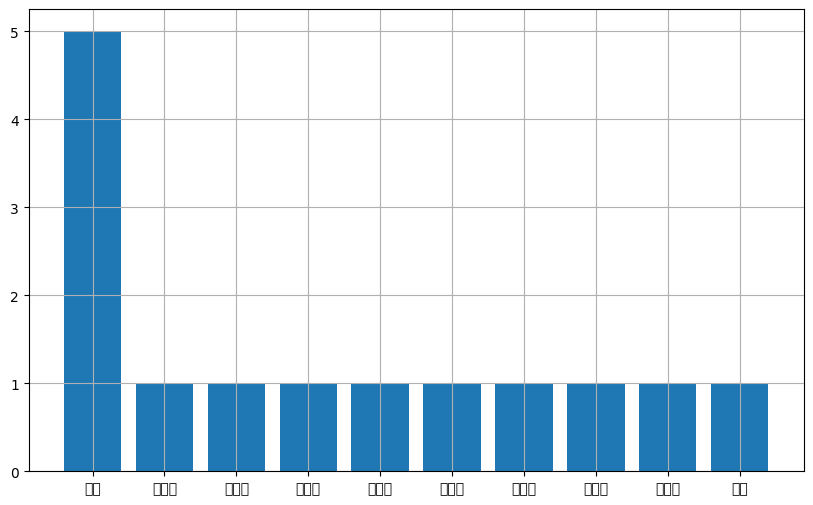

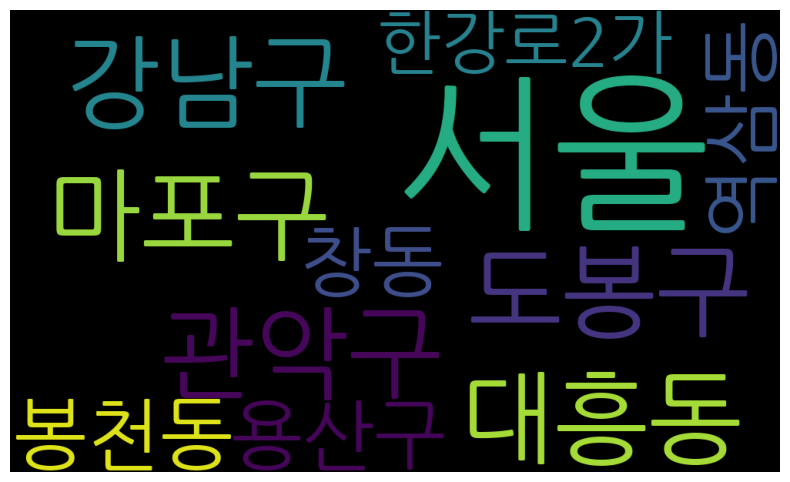

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

plt.rcParams['figure.figsize'] = (10,6)

# 말뭉치를 토큰화하여 빈도수 가져오기
def get_wordTokenCount(corpus):


    # 말뭉치를 토큰화하기
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


# 단어(토큰) 빈도수 막대 그래프 그리기
def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'./token_bar_graph.png')

# 워드클라우드 만들기
def make_wordcloud(feature_name, count):
    # 한글 폰트 경로를 설정
    font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  #코랩
    # font_path = 'malgun'  # C:/Windows/Fonts/                                  #window

    # (토큰명, 빈도수) 딕셔너리 타입으로 변환
    data = dict(zip(feature_name, count))

    # 워드클라우드로 그래프로 시각화
    wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
    plt.axis("off")
    plt.show()

    # 이미지 파일로 저장하기
    wc.to_file(f'./워드클라우드.png')


# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus = df['add'].to_list()
# print(corpus)

# 2.말뭉치를 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 3.단어(토큰) 빈도수 막대 그래프 그리기(상위 10개)
draw_wordTokenCountGraph(feature_name[:10], count[:10])

# 3.워드 클라우드 만들기
make_wordcloud(feature_name, count)

In [63]:
import pandas as pd
import requests
import chromedriver_autoinstaller
from bs4 import BeautifulSoup
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# # chrome driver를 자동으로 설치함
# chromedriver_autoinstaller.install()

# options = webdriver.ChromeOptions() # Browser 세팅하기
# options.add_argument('lang=ko_KR') # 사용언어 한국어
# options.add_argument('disable-gpu') # 하드웨어 가속 안함
# options.add_argument('headless') # 창 숨기기

# # 브라우저 세팅
# driver = webdriver.Chrome(options=options)

url = 'https://m.place.naver.com/place/list?query=%EC%84%9C%EC%9A%B8%20%ED%95%84%EB%9D%BC%ED%85%8C%EC%8A%A4%20%EC%9C%84%EC%B9%98&x=126.9783882&y=37.5666103&start=1&display=100&adult=false&spq=false&highlight=true&deviceType=mobile&sessionId=JZhqsp%2BsxGhCk5nI6hJvhA%3D%3D&sm=mtb_hty.top&ssc=tab.m.all&level=top&entry=pll'
print(url)

response = requests.get(url)
t_list, d_list = [],[]
print(response.status_code)
if response.status_code == 429:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')

    for i in range(1,6):
        # if i % 5 == 0:
        #     driver = webdriver.Chrome()

        #     # 웹페이지로 이동
        #     driver.get('#loc-main-section-root > div > div.rdX0R > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > a:nth-child(1) > div > div > span.YwYLL')

        #     # 클릭(copy.xpath 이용)
        #     search_button = driver.find_element(By.XPATH, '//*[@id="loc-main-section-root"]/div/div[4]/div/a"]')
        #     search_button.click()

        title = soup.select_one(f"#_list_scroll_container > div > div > div:nth-child(2) > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > a:nth-child(1) > div > div > span.YwYLL")
        if title is not None:
            t_list.append(title.get_text())
        else:
            break

        title = soup.select_one(f"#_list_scroll_container > div > div > div:nth-child(2) > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > div:nth-child(4) > div > span:nth-child(2) > a > span.Pb4bU")
        if title is not None:
            d_list.append(title.get_text())
        else:
            title = soup.select_one(f"#_list_scroll_container > div > div > div:nth-child(2) > ul > li:nth-child({i}) > div.qbGlu > div.ouxiq > div:nth-child(4) > div > span:nth-child(2) > a > span.Pb4bU")
            if title is not None:
                d_list.append(title.get_text())
            else:
                d_list.append('NoN')


else :
    print(response.status_code)
print(f'{t_list}')
print(f'{d_list}')

data = {'title': t_list, 'add':d_list}
df = pd.DataFrame(data)

df.to_csv('my_naver_pilates.csv', index=False) # 파일로 저장하기

df.head()

https://m.place.naver.com/place/list?query=%EC%84%9C%EC%9A%B8%20%ED%95%84%EB%9D%BC%ED%85%8C%EC%8A%A4%20%EC%9C%84%EC%B9%98&x=126.9783882&y=37.5666103&start=1&display=100&adult=false&spq=false&highlight=true&deviceType=mobile&sessionId=JZhqsp%2BsxGhCk5nI6hJvhA%3D%3D&sm=mtb_hty.top&ssc=tab.m.all&level=top&entry=pll
429
[]
[]


,title,add
